In [1]:
import pandas as pd
from data import load_database_train
from plotter import plot_all_readings
from preprocessing import InterpolateRawData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


%matplotlib inline

# Dados de treino

In [2]:
database_train = load_database_train()
print(database_train.__dict__.keys())

dict_keys(['datalist', 'datadict', 'X', 'y', 'cv_author', 'label_encoder', 'ones_encoder', 'y_encoded'])


In [6]:
df = pd.DataFrame(data=database_train.datadict)
pd.set_option('display.max_rows', None)
df

,spell,author,device,date,acc_data,gyr_data,time
0,INCENDIO,HEITOR,MOTO_X,2020-07-27 09:31:33.276083,281,281,1356.353760
1,REVELIO,ANDERSON,SAMSUNG_A5,2020-07-27 10:08:40.544384,299,299,1500.133116
2,ARRESTO_MOMENTUM,ANDERSON,SAMSUNG_A5,2020-07-27 09:59:59.608225,502,502,2542.641762
3,ARRESTO_MOMENTUM,HEITOR,MOTO_X,2020-07-27 09:29:01.692883,304,303,1467.773438
4,FINITE_INCANTATEM,ANDERSON,SAMSUNG_A5,2020-07-27 10:05:32.793164,338,338,1714.720573
5,FINITE_INCANTATEM,GUILHERME,SAMSUNG_S8,2020-07-27 21:10:12.866349,1499,1498,2998.009820
6,INCENDIO,HEITOR,MOTO_X,2020-07-27 09:32:01.244011,300,300,1448.425293
7,ALOHOMORA,GUILHERME,SAMSUNG_S8,2020-07-27 21:04:00.543441,2355,2355,4711.320014
8,INCENDIO,HEITOR,MOTO_X,2020-07-27 09:31:55.488731,303,303,1462.951660
9,ALOHOMORA,ANDERSON,SAMSUNG_A5,2020-07-31 13:05:50.198368,451,451,2271.267653


In [7]:
df.groupby(['author', 'spell']).size()

author     spell             
ANDERSON   ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
DIEGO      ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
GUILHERME  ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
HEITOR     ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
YURI       ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     2

In [8]:
df.sort_values('time')

,spell,author,device,date,acc_data,gyr_data,time
460,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:54:17.860105,207,207,1049.664489
472,ARRESTO_MOMENTUM,YURI,SAMSUNG_NOTE_10,2020-07-26 21:22:03.196856,553,553,1103.867750
519,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:10.368367,221,221,1119.231221
572,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:54:39.735411,223,223,1128.469319
238,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:06.125662,225,225,1134.372570
334,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:28.745188,227,227,1145.101746
288,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:47.158831,227,227,1154.956887
140,ALOHOMORA,ANDERSON,SAMSUNG_A5,2020-07-27 10:04:26.838803,231,231,1167.351746
276,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:54:34.167558,231,231,1170.515977
443,FINITE_INCANTATEM,YURI,SAMSUNG_NOTE_10,2020-07-26 21:24:13.399356,590,590,1177.856268


### Exemplo de dado com gráfico

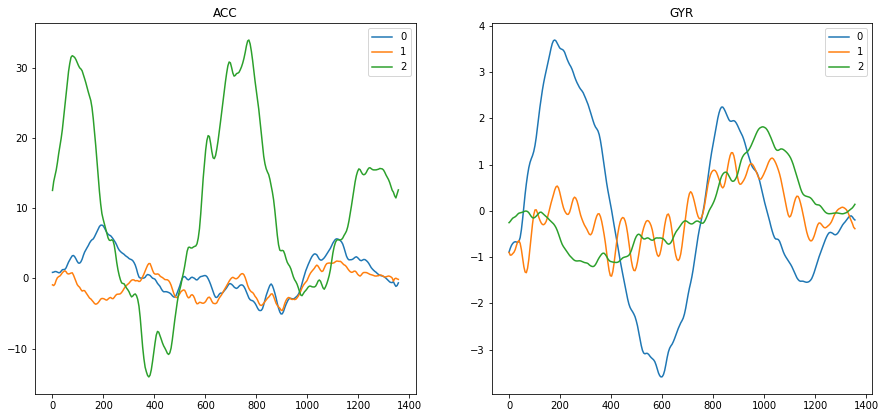

In [9]:
plot_all_readings(database_train.datalist[0].readings, table_format=(0, 2))

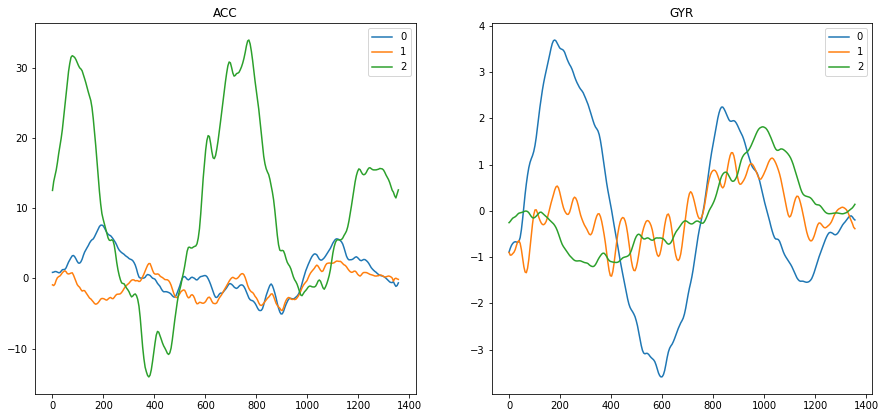

In [10]:
plot_all_readings(database_train.datalist[0].readings, table_format=(0, 2))

In [11]:
database_train.datalist[0].readings

{'ACC': array([[ 0.00000000e+00,  8.57727050e-01, -9.19006350e-01,
          1.25303340e+01],
        [ 4.82177800e+00,  8.96011350e-01, -1.02189640e+00,
          1.38057100e+01],
        [ 9.67407300e+00,  9.77355960e-01, -7.94586200e-01,
          1.46073000e+01],
        ...,
        [ 1.34667969e+03, -1.13789370e+00,  2.85491940e-02,
          1.14607390e+01],
        [ 1.35153198e+03, -1.01347350e+00, -7.19451900e-02,
          1.20182650e+01],
        [ 1.35635376e+03, -6.35406500e-01, -1.38946530e-01,
          1.26069030e+01]]),
 'GYR': array([[ 0.00000000e+00, -8.91204830e-01, -8.97949200e-01,
         -2.54913330e-01],
        [ 4.82177800e+00, -8.08136000e-01, -9.57809450e-01,
         -2.26821900e-01],
        [ 9.67407300e+00, -7.44598400e-01, -9.52926640e-01,
         -1.88964840e-01],
        ...,
        [ 1.34667969e+03, -1.31301880e-01, -2.76092530e-01,
          6.63757300e-02],
        [ 1.35153198e+03, -1.71615600e-01, -3.54278560e-01,
          1.01806640e-01],
 

# Processamento de dados para o modelagem

<Figure size 432x288 with 0 Axes>

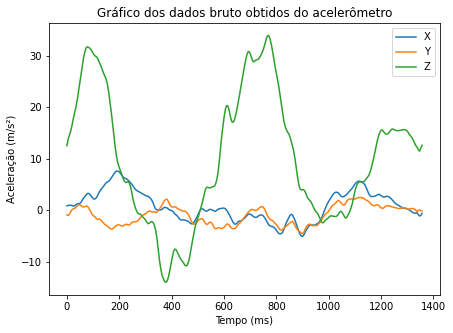

In [42]:
plt.figure()
readings = database_train.datalist[0].readings['ACC']
df = pd.DataFrame(data=readings[:, 1:], index=readings[:, 0], columns=['X', 'Y', 'Z'])
df.plot(title="Gráfico dos dados bruto obtidos do acelerômetro", figsize=(7, 5))
plt.xlabel('Tempo (ms)')
plt.ylabel('Aceleração (m/s²)')
plt.show()

### Modos de interpolação

<Figure size 432x288 with 0 Axes>

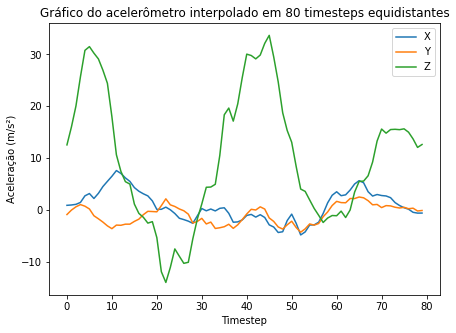

In [6]:
plt.figure()
X = InterpolateRawData(num_samples=80, flatten_data=False, features_name=["ACC"]).fit_transform(database_train.X)
df = pd.DataFrame(data=X[0], columns=['X', 'Y', 'Z'])
df.plot(title="Gráfico do acelerômetro interpolado em 80 timesteps equidistantes", figsize=(7, 5))
plt.xlabel('Timestep')
plt.ylabel('Aceleração (m/s²)')
plt.show()

<AxesSubplot:title={'center':'Gráfico do acelerometro interpolada em timesteps equidistantes flatten'}>

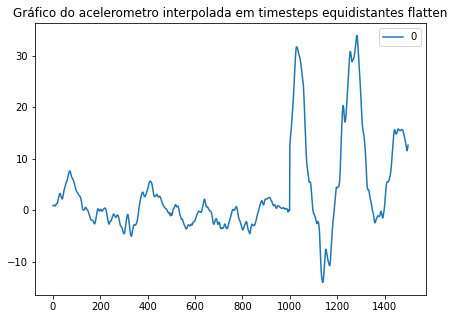

In [22]:
X = InterpolateRawData(num_samples=500, flatten_data=True, features_name=["ACC"]).fit_transform(database_train.X)
df = pd.DataFrame(data=X[0])
df.plot(title="Gráfico do acelerometro interpolada em timesteps equidistantes flatten", figsize=(7, 5))

<Figure size 432x288 with 0 Axes>

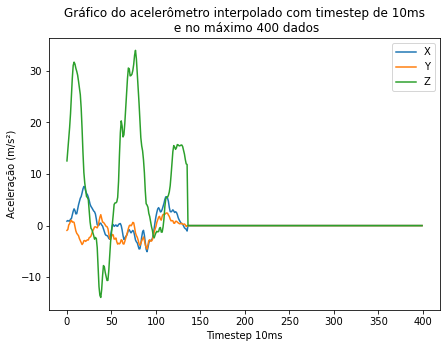

In [4]:
plt.figure()

X = InterpolateRawData(num_samples=None, timestep=10, max_time=4000, 
                       flatten_data=False, features_name=["ACC"]).fit_transform(database_train.X)
df = pd.DataFrame(data=X[0], columns=['X', 'Y', 'Z'])
df.plot(title="Gráfico do acelerômetro interpolado com timestep de 10ms\n e no máximo 400 dados", figsize=(7, 5))
plt.xlabel('Timestep 10ms')
plt.ylabel('Aceleração (m/s²)')
plt.show()

<AxesSubplot:title={'center':'Gráfico com tempo maximo 6s e timestep de 10ms flaten'}>

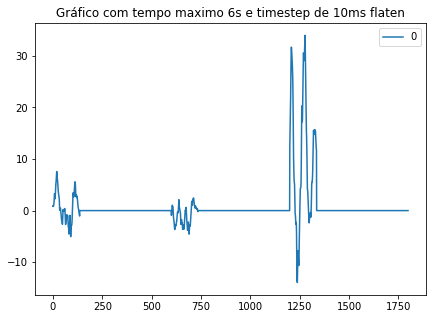

In [20]:
X = InterpolateRawData(num_samples=None, timestep=10, max_time=6000, 
                       flatten_data=True, features_name=["ACC"]).fit_transform(database_train.X)
df = pd.DataFrame(data=X[0])
df.plot(title="Gráfico com tempo maximo 6s e timestep de 10ms flaten", figsize=(7, 5))